# Prédiction de la demande alimentaire avec LSTM
Ce notebook présente un pipeline de prédiction de la demande à l'aide d'une série temporelle et d'un modèle LSTM.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

## 1. Simulation ou chargement des données temporelles
Adaptez cette cellule selon la disponibilité de vos données historiques.

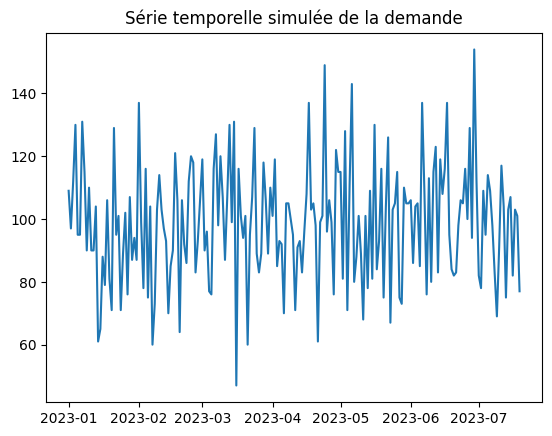

In [8]:
# Simulation d'une série temporelle de demande
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=200)
demand = np.abs(np.random.normal(loc=100, scale=20, size=200)).astype(int)
df = pd.DataFrame({'date': dates, 'demand': demand})
df.set_index('date', inplace=True)
plt.plot(df.index, df['demand'])
plt.title('Série temporelle simulée de la demande')
plt.show()

## 2. Prétraitement et création des séquences pour LSTM

In [9]:
scaler = MinMaxScaler()
scaled_demand = scaler.fit_transform(df[['demand']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_demand, seq_length)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## 3. Construction et entraînement du modèle LSTM

In [10]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

c:\Users\Dell\Desktop\projet problem solving 2\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.1568 - val_loss: 0.1076
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0753 - val_loss: 0.0398
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0342 - val_loss: 0.0343
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0493 - val_loss: 0.0307
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0395 - val_loss: 0.0322
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0405 - val_loss: 0.0327
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0298 - val_loss: 0.0309
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0367 - val_loss: 0.0308
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0326 - val_loss: 0.0311
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0326 - val_loss: 0.0307
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0406 - val_loss: 0.0312
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0398 - val_loss: 0.0312


## 4. Évaluation du modèle

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step
MAE: 14.78, RMSE: 18.41


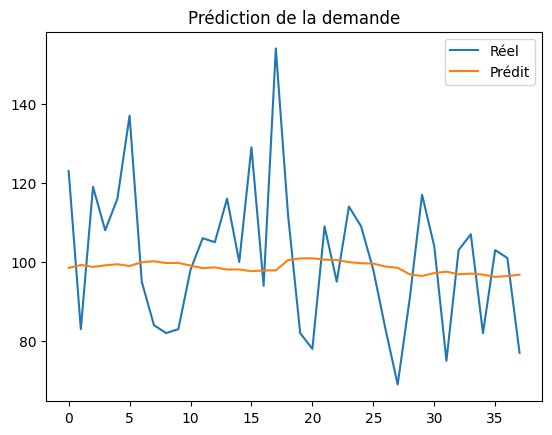

In [11]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')
plt.plot(y_test_inv, label='Réel')
plt.plot(y_pred_inv, label='Prédit')
plt.legend()
plt.title('Prédiction de la demande')
plt.show()

## 5. Sauvegarde du modèle

In [12]:
model.save('lstm_model.h5')
print('Modèle sauvegardé sous lstm_model.h5')

Modèle sauvegardé sous lstm_model.h5
